In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
print(train.shape,test.shape)

(614, 13) (367, 12)


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

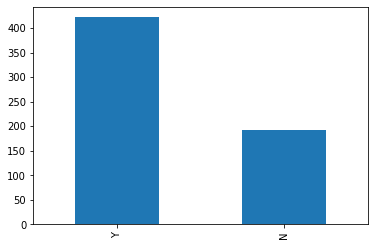

In [10]:
train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Credit_History'}>

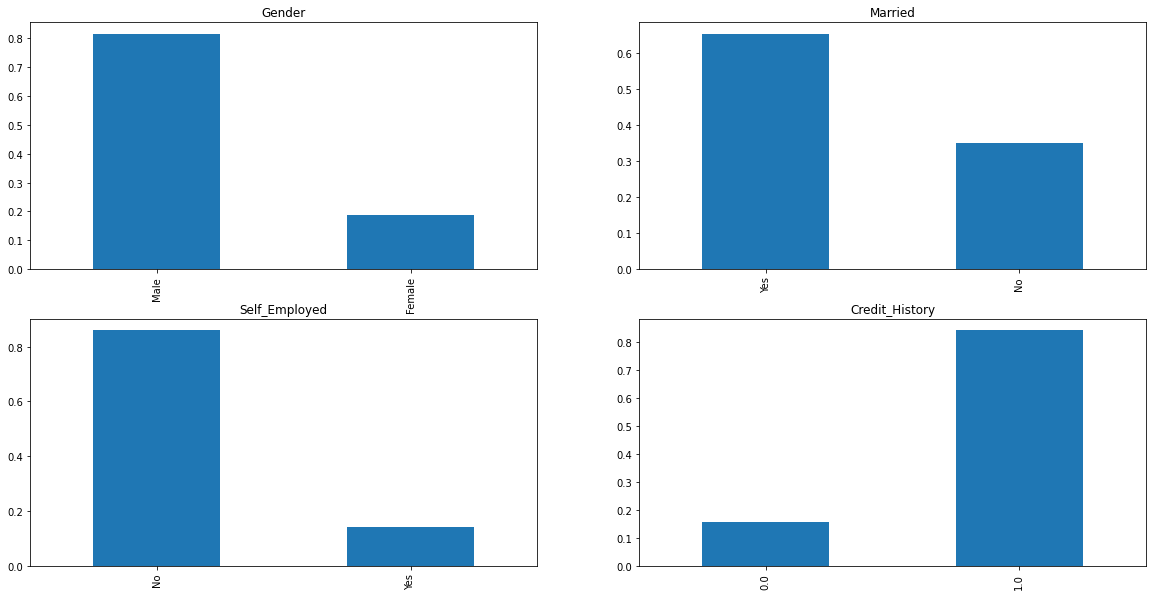

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

<AxesSubplot:title={'center':'Property_Area'}>

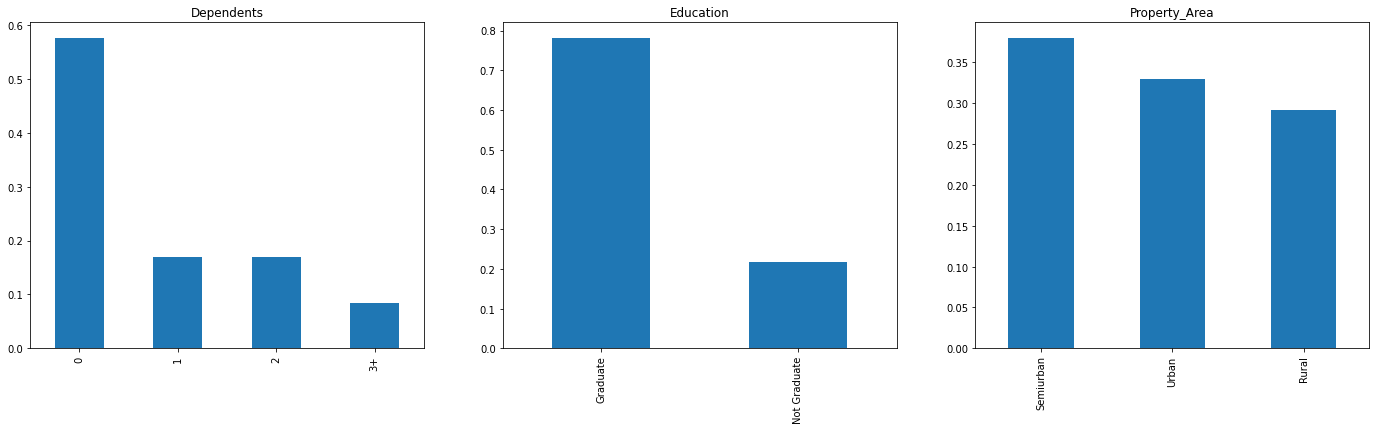

In [12]:
#Independent Variable(Ordinal)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

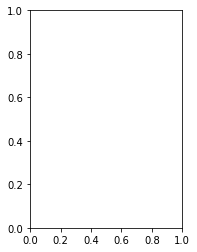

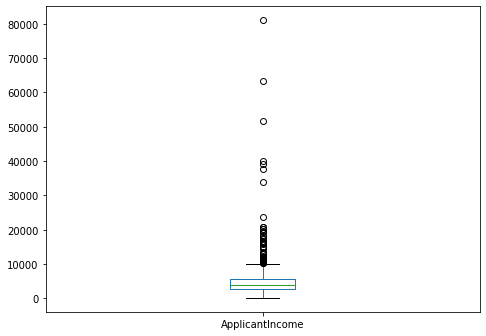

In [13]:
#Independent Variable (Numerical)
plt.figure(1) 
plt.subplot(121) 
sns.displot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

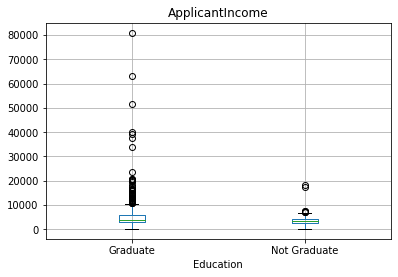

In [14]:
train.boxplot(column='ApplicantIncome', by='Education') 
plt.suptitle("")

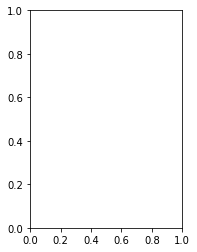

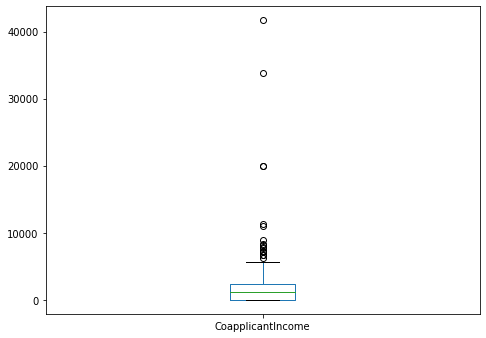

In [15]:
plt.figure(1)
plt.subplot(121)
sns.displot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

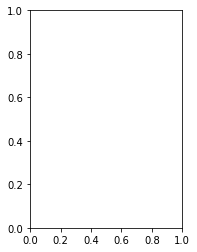

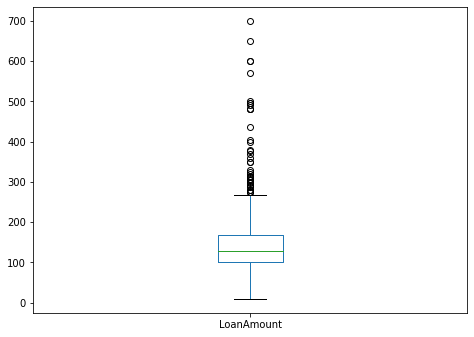

In [16]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.displot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Gender'>

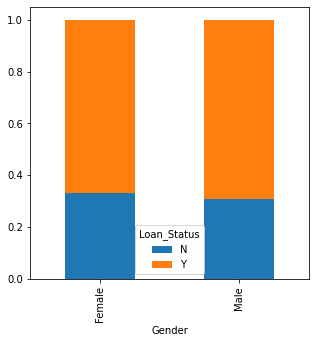

In [17]:
#Bi-variate
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(5,5))


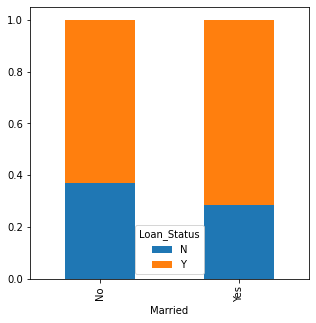

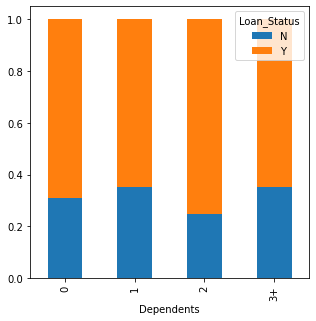

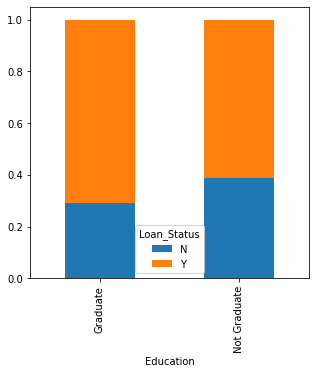

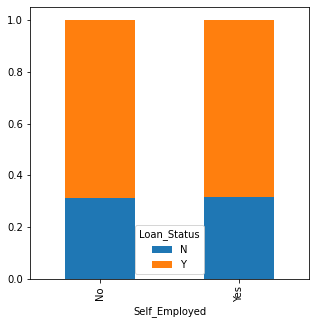

In [18]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(5,5))
plt.show()

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(5,5))
plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(5,5))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(5,5))
plt.show()

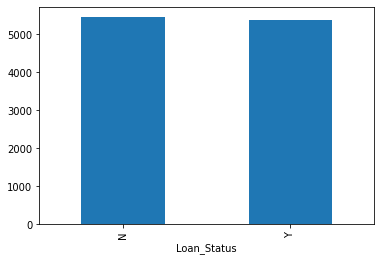

In [19]:
#Numerical Independent Variable vs Target Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar();

In [20]:
# bins=[0,2500,4000,6000,81000] 
# group=('Low','Average','High','Very High')
# train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

# Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
# Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
# plt.xlabel('ApplicantIncome') 
# plt.ylabel('Percentage')

In [21]:
# bins=[0,1000,3000,42000] 
# group=('Low','Average','High')
# train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

# Coapplication_Income_bin = pd.crosstab(train['CoapplicantIncome'],train['Loan_Status'])
# Coapplication_Income_bin.div(Coapplication_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
# plt.xlabel('CoapplicantIncome') 
# plt.ylabel('Percentage')

In [22]:
# train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

# bins=[0,2500,4000,6000,81000]
# group=['Low','Average','High','Very high']
# train['Total_Income_bin']=pd.cut(train['Total_Income'],train['Loan_Status'])
# Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
# plt.xlabel('Total_Income')
# plt.ylabel('Percentage')

# Missing Values Imputation

In [23]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [25]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [26]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [29]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [30]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# outlier treatment

<AxesSubplot:>

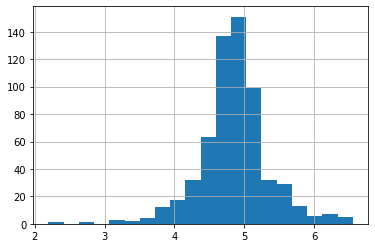

In [31]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [32]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [33]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


In [34]:
train.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

# Model Building

In [35]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [37]:
X = train.drop('Loan_Status',1)
train['Loan_Status']= train['Loan_Status'].map({'Y':1, 'N':0})
y = train.Loan_Status
print(X.shape,y.shape)

(614, 12) (614,)


In [38]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LoanAmount_log'],
      dtype='object')

In [39]:
X.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
LoanAmount_log       float64
dtype: object

In [42]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
#train.dtypes

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=0)

In [44]:
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
351,8750,4167.0,308.0,360.0,1.0,5.730100,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0
593,3859,3300.0,142.0,180.0,1.0,4.955827,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
320,2400,2167.0,115.0,360.0,1.0,4.744932,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
186,2178,0.0,66.0,300.0,0.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,1,0,0
557,10139,0.0,260.0,360.0,1.0,5.560682,0,1,0,1,...,0,0,1,1,0,0,1,0,1,0


# Feature Selection

In [65]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train)

VarianceThreshold(threshold=0)

In [66]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [67]:
sum(var_thres.get_support())

21

In [68]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [70]:
for column in constant_columns:
    print(column)

# Logistic Regression Alogorithm

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [92]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [93]:
pred = model.predict(x_test)

In [94]:
accuracy_score(y_test,pred)

0.827027027027027

In [95]:
pred_test = model.predict(test)

In [96]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [97]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [98]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [99]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [100]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)

In [101]:
pd.read_csv('logistic.csv').head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Logistic Regression using stratified Cross Validation

In [102]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy_Score',score)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Logistic_CV.csv',index=False)

In [ ]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()